In [1]:
import geopandas as gpd

In [2]:
crs = "ESRI:102008"

In [18]:
filepath = '/Users/e32648/Documents/CriticalMAAS/12-month_hack/mac_install/output/rank/gte-large-en-v1.5/SGMC_preproc_v1.tungsten_skarn_v2.gpkg'
data = gpd.read_file(filepath).to_crs(crs)
data

,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,UNIT_NAME,AGE_MIN,AGE_MAX,MAJOR1,MAJOR2,MAJOR3,...,bge_depositional_environment,bge_tectonic_setting,bge_ore_mineralogy,bge_alteration,bge_ore_controls,bge_geochemical_signatures,bge_geophysical_signature,age_range,bge_all,geometry
0,AZ,?c,TRc;0,AZTRc;0,Chinle Formation,Phanerozoic - Mesozoic - Triassic - Late-Trias...,Phanerozoic - Mesozoic - Triassic - Late-Trias...,Mudstone,None,None,...,0.362046,0.471942,0.279424,0.278449,0.417909,0.487760,0.315037,0.798899,0.433235,"MULTIPOLYGON (((-1515216.552 -262286.207, -151..."
1,AZ,?m,TRm;0,AZTRm;0,Moenkopi Formation,Phanerozoic - Mesozoic - Triassic - Late-Trias...,Phanerozoic - Mesozoic - Triassic - Middle-Tri...,Sandstone,Mudstone,None,...,0.519263,0.572500,0.547735,0.652473,0.471456,0.573639,0.633125,0.799179,0.587113,"MULTIPOLYGON (((-1515359.406 -258632.963, -151..."
2,AZ,Jgc,Jgc;0,AZJgc;0,Glen Canyon Group,Phanerozoic - Mesozoic - Jurassic - Early-Jura...,Phanerozoic - Mesozoic - Triassic - Late-Trias...,Sandstone,None,None,...,0.371329,0.456437,0.433427,0.520048,0.351799,0.536171,0.400406,0.801997,0.499914,"MULTIPOLYGON (((-1517900.165 -262385.25, -1517..."
3,AZ,M?,MCA;0,AZMCA;0,"Mississippian, Devonian, and Cambrian sediment...",Phanerozoic - Paleozoic - Carboniferous - Late...,Phanerozoic - Paleozoic - Cambrian - Early-Cam...,Sandstone,Shale,Limestone,...,0.448080,0.725021,0.474737,0.497186,0.607219,0.632051,0.628118,0.769470,0.591986,"MULTIPOLYGON (((-1528473.304 -332652.464, -152..."
4,AZ,P,P;0,AZP;0,Permian sedimentary rocks,Phanerozoic - Paleozoic - Permian - Guadalupia...,Phanerozoic - Paleozoic - Permian - Cisuralian...,Sandstone,Limestone,None,...,0.341198,0.464855,0.474810,0.424432,0.466800,0.367473,0.549060,0.783557,0.444762,"MULTIPOLYGON (((-1519105.044 -281073.868, -151..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,UT,Tmv,Tmv;0,UTTmv;0,"Miocene volcanic rocks, undivided",Phanerozoic - Cenozoic - Tertiary-Neogene - Mi...,Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Felsic-volcanic,None,None,...,0.512012,0.533694,0.333842,0.475423,0.531385,0.398905,0.534023,0.784821,0.443883,"MULTIPOLYGON (((-1494144.518 -154003.118, -149..."
376,UT,Tov,Tov;4,UTTov;4,"Isom Fm, Needles Range Fm, Escalante Desert Fm...",Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Felsic-volcanic,Mafic-volcanic,None,...,0.540626,0.290209,0.538094,0.588703,0.405337,0.606369,0.629559,0.808508,0.497519,"MULTIPOLYGON (((-1491414.213 -119946.097, -149..."
377,UT,Tov,Tov;8,UTTov;8,"Isom Fm, Needles Range Fm, and Bullion Canyon ...",Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Felsic-volcanic,Andesite,None,...,0.518446,0.443798,0.515363,0.615003,0.451798,0.770330,0.690945,0.808508,0.535176,"MULTIPOLYGON (((-1491313.599 -138044.61, -1491..."
378,UT,Tr1,TR1;4,UTTR1;4,Moenkopi and Thaynes Formations,Phanerozoic - Mesozoic - Triassic - Early-Tria...,Phanerozoic - Mesozoic - Triassic - Early-Tria...,Siltstone,Limestone,None,...,0.627395,0.784554,0.588358,0.666946,0.686276,0.652529,0.813928,0.826051,0.684962,"MULTIPOLYGON (((-1397066.668 354016.128, -1396..."


<Axes: >

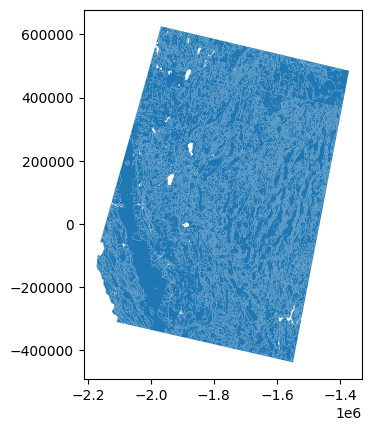

In [19]:
data.plot()

In [20]:
def find_contact(data, layers, buffer1=50, buffer2=None):
    assert len(layers) > 1
    temp_layers = []
    for i, key in enumerate(layers.keys()):
        temp_ = data[data[key] > layers[key]]

        temp_ = gpd.GeoDataFrame(temp_, geometry=temp_.buffer(buffer1))
        temp_ = temp_.rename(columns=lambda col: f"{col}_{i}" if col != 'geometry' else col)

        temp_layers.append(temp_)

    result = temp_layers[0]
    for temp_ in temp_layers[1:]:
        result = gpd.overlay(result, temp_,  how="intersection")

    if buffer2:
        result = result.buffer(buffer2)
    return result

In [21]:
permissive_tracts = gpd.read_file('boundary.gpkg').to_crs(crs)

In [22]:
def IOU(pred, gt, crs="ESRI:102008"):       
    intersection = pred.to_crs(crs).overlay(gt.to_crs(crs), how="intersection")
    intersection = intersection.union_all().area
    union = pred.to_crs(crs).overlay(gt.to_crs(crs), how="union")
    union = union.union_all().area
    iou = intersection/(union + 1e-20)

    precision = intersection/(pred.union_all().area + 1e-20)
    recall = intersection/(gt.union_all().area + 1e-20)
    return iou, precision, recall

In [23]:
extent = gpd.read_file('extent.gpkg')

cols = data.columns
data_ = data.overlay(extent.to_crs(crs), how="intersection")[cols]

cols = permissive_tracts.columns
permissive_tracts_ = permissive_tracts.overlay(extent.to_crs(crs), how="intersection")[cols]


<Axes: >

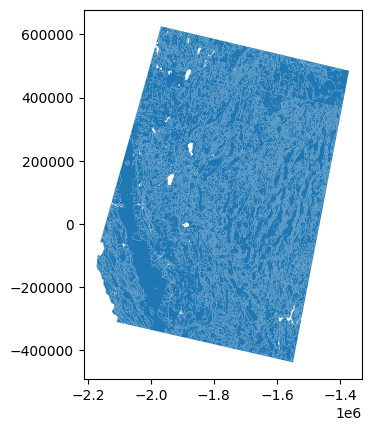

In [24]:
data.plot()

<Axes: >

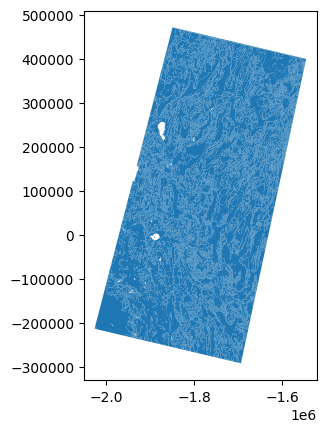

In [25]:
data_.plot()

In [26]:
data_

,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,UNIT_NAME,AGE_MIN,AGE_MAX,MAJOR1,MAJOR2,MAJOR3,...,bge_depositional_environment,bge_tectonic_setting,bge_ore_mineralogy,bge_alteration,bge_ore_controls,bge_geochemical_signatures,bge_geophysical_signature,age_range,bge_all,geometry
0,CA,C,C2;0,CAC2;0,"Carboniferous marine rocks, unit 2 (SE Califor...",Phanerozoic - Paleozoic - Permian - Cisuralian,Phanerozoic - Paleozoic - Carboniferous - Miss...,Limestone,None,None,...,0.527890,0.739322,0.367104,0.357941,0.728900,0.675450,0.678915,0.797162,0.570130,"MULTIPOLYGON (((-1811407.136 -253617.846, -181..."
1,CA,C,C3;0,CAC3;0,"Carboniferous marine rocks, unit 3 (SE Califor...",Phanerozoic - Paleozoic - Permian - Cisuralian,Phanerozoic - Paleozoic - Devonian - Late-Devo...,Shale,Limestone,None,...,0.544250,0.735444,0.373375,0.446561,0.684271,0.661737,0.699869,0.795449,0.577733,"MULTIPOLYGON (((-1831918.115 -203399.568, -183..."
2,CA,C,C7;0,CAC7;0,"Carboniferous marine rocks, unit 7 (Bishop)",Phanerozoic - Paleozoic - Permian - Cisuralian,Phanerozoic - Paleozoic - Carboniferous - Miss...,Hornfels,Marble,None,...,0.556394,0.707603,0.554369,0.619313,0.730418,0.659119,0.720545,0.797162,0.616985,"MULTIPOLYGON (((-1879421.698 -88233.21, -18794..."
3,CA,C,C8;0,CAC8;0,"Carboniferous marine rocks, unit 8 (Mono Lake)",Phanerozoic - Paleozoic - Devonian,Phanerozoic - Paleozoic - Ordovician,Chert,Argillite,None,...,0.553127,0.680834,0.501518,0.660013,0.725420,0.652399,0.751016,0.796112,0.624470,"MULTIPOLYGON (((-1904601.931 -37171.383, -1904..."
4,CA,Ca,CA;0,CACA;0,Cambrian marine rocks,Phanerozoic - Paleozoic - Devonian - Middle-De...,preCambrian-Proterozoic - Neoproterozoic,Sandstone,Dolostone,None,...,0.557096,0.717525,0.615383,0.564508,0.631578,0.591018,0.683514,0.728802,0.617116,"MULTIPOLYGON (((-1789078.505 -225907.963, -178..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,OR,Ts,Ts;0,ORTs;0,Tuffaceous sedimentary rocks and tuff,Phanerozoic - Cenozoic - Tertiary-Neogene - Pl...,Phanerozoic - Cenozoic - Tertiary-Neogene - Mi...,Sandstone,Siltstone,Mudstone,...,0.490223,0.579813,0.386058,0.496356,0.446191,0.480798,0.474386,0.784759,0.501470,"MULTIPOLYGON (((-1784956.957 456176.965, -1784..."
177,OR,Tts,Tts;0,ORTts;0,"Tuffaceous sedimentary rocks, tuffs, pumicites...",Phanerozoic - Cenozoic - Tertiary-Neogene - Mi...,Phanerozoic - Cenozoic - Tertiary-Neogene - Mi...,Rhyolite,None,None,...,0.564230,0.596046,0.501686,0.503539,0.540541,0.586713,0.567018,0.772038,0.547323,"MULTIPOLYGON (((-1823876.552 465192.799, -1824..."
178,OR,Tvm,Tvm;0,ORTvm;0,Mafic and intermediate vent rocks,Phanerozoic - Cenozoic - Tertiary-Neogene - Pl...,Phanerozoic - Cenozoic - Tertiary-Neogene - Mi...,Basalt,Andesite,None,...,0.609385,0.490421,0.519141,0.596518,0.559630,0.662090,0.529230,0.784759,0.534671,"MULTIPOLYGON (((-1640525.298 420671.289, -1640..."
179,OR,Tvs,Tvs;0,ORTvs;0,Silicic vent rocks,Phanerozoic - Cenozoic - Tertiary-Neogene - Pl...,Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Rhyolite,Dacite,None,...,0.727060,0.570565,0.540013,0.555295,0.682933,0.741795,0.612882,0.802306,0.623424,"MULTIPOLYGON (((-1837958.569 468234.324, -1838..."


<Axes: >

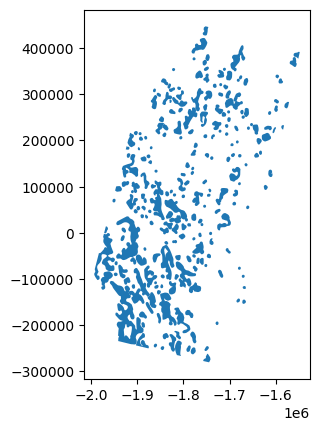

In [27]:
permissive_tracts.plot()

<Axes: >

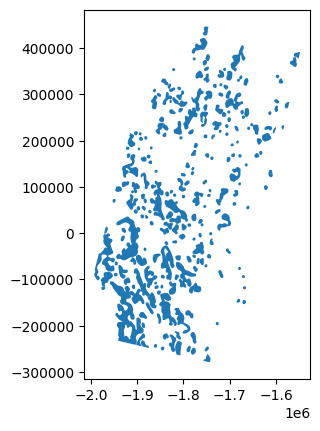

In [28]:
permissive_tracts_.plot()

In [30]:
best_f1 = 0.0

for th_hst in [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]:
    for th_src in [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]:
        layers = {
            'bge_rock_types_host': th_hst,
            'bge_rock_types_source': th_src,
        }
        print(layers)
        # contact = find_contact(data_, layers)
        contact = find_contact(data_, layers, buffer1=50, buffer2=None)

        for buffer2 in [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
            contact_buffered = contact.buffer(buffer2)
            try:
                iou, prec, recall = IOU(pred=contact_buffered.to_frame(), gt=permissive_tracts_)
                f1 = (2*prec*recall)/(prec+recall+1e-20)
                if f1 > best_f1:
                    best_f1 = f1
                    # contact.to_file('contact_best.gpkg', driver='GPKG')
                    contact_buffered.to_file(f'contact_buffered_best.gpkg', driver='GPKG')
                print(buffer2, iou, prec, recall, f1)
            except Exception as e:
                print(f'error while computing metric for {layers} with buffer {buffer2}')
                print(e)

{'bge_rock_types_host': 0.5, 'bge_rock_types_source': 0.5}
1000 0.30641508521012345 0.3323779719534415 0.7968610504040191 0.4690929991226177
2000 0.3008315438681772 0.30714623040038 0.9360304616048142 0.46252190806139265
3000 0.2792824944987135 0.27980626350184246 0.9933420966409185 0.43662364755198696
error while computing metric for {'bge_rock_types_host': 0.5, 'bge_rock_types_source': 0.5} with buffer 4000
TopologyException: found non-noded intersection between LINESTRING (-1.5703e+06 275965, -1.5703e+06 275963) and LINESTRING (-1.5703e+06 275965, -1.5703e+06 275963) at -1570301.4084276576 275965.08098367602
5000 0.23311708141872498 0.2331383273906332 0.9996092319139529 0.378093994368353
6000 0.21977279867873034 0.21978216071165635 0.9998062152401919 0.36035038478770887
7000 0.2102613543901154 0.21026364395348288 0.9999482146957008 0.3474643780492747
8000 0.20322848177774094 0.20311342791513687 1.0 0.3376463485527048
9000 0.19767632971964924 0.19767632971964907 0.9999999999999998 0.

In [15]:
filepath2 = '/Users/e32648/Documents/CriticalMAAS/12-month_hack/mac_install/output/rank/SGMC_preproc_v1.tungsten_skarn.gpkg'
data2 = gpd.read_file(filepath2)

<Axes: >

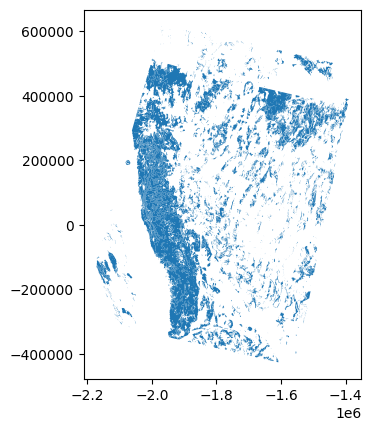

In [16]:
single_layer = data2[data2['bge_rock_types'] > 0.8]
single_layer.plot()

In [17]:
for b in [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
    iou = IOU(permissive_tracts, single_layer.to_crs("ESRI:102008").buffer(b).to_frame())
    print(iou)

(0.13484519775420165, 0.7238745388562252, 0.1421573984792861)
(0.13389941142306527, 0.8632385380210509, 0.1368014438666034)
(0.12814367430680426, 0.9435519939643339, 0.12913363813880951)
(0.11709907927535863, 0.9600460454988018, 0.1176725302297202)
(0.10831514204418058, 0.9674590771113444, 0.10871120181567198)
(0.10170647282125192, 0.9731573604022944, 0.1019926001930384)
(0.09666918229536817, 0.9779309141304944, 0.09688053155329385)
(0.09279527609429199, 0.9821892981885194, 0.09295168770297288)
(0.08968808716473924, 0.985862676945072, 0.08980358642421407)
(0.08711827999259661, 0.9887260252204206, 0.0872049066001139)
